In [5]:
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt # for making figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pprint import pprint

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
device

device(type='cpu')

In [8]:
with open("shakespeare.txt", "r") as file:
    content = file.read()

In [9]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(content)))
stoi = {s:i for i,s in enumerate(chars)}
# stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
pprint(itos)

{0: '\n',
 1: ' ',
 2: '!',
 3: "'",
 4: ',',
 5: '-',
 6: '.',
 7: ':',
 8: ';',
 9: '?',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'c',
 39: 'd',
 40: 'e',
 41: 'f',
 42: 'g',
 43: 'h',
 44: 'i',
 45: 'j',
 46: 'k',
 47: 'l',
 48: 'm',
 49: 'n',
 50: 'o',
 51: 'p',
 52: 'q',
 53: 'r',
 54: 's',
 55: 't',
 56: 'u',
 57: 'v',
 58: 'w',
 59: 'x',
 60: 'y',
 61: 'z'}


In [10]:
block_size = 4 # context length: how many characters do we take to predict the next one?
X, Y = [], []

  
#print(w)
context = [0] * block_size
for ch in content:
  ix = stoi[ch]
  X.append(context)
  Y.append(ix)
  print(''.join(itos[i] for i in context), '--->', itos[ix])
  context = context[1:] + [ix] # crop and append
  
# Move data to GPU

X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)





 ---> T



T ---> h


Th ---> a

Tha ---> t
That ---> ,
hat, --->  
at,  ---> p
t, p ---> o
, po ---> o
 poo ---> r
poor --->  
oor  ---> c
or c ---> o
r co ---> n
 con ---> t
cont ---> e
onte ---> m
ntem ---> p
temp ---> t
empt ---> ,
mpt, --->  
pt,  ---> o
t, o ---> r
, or --->  
 or  ---> c
or c ---> l
r cl ---> a
 cla ---> i
clai ---> m
laim ---> '
aim' ---> d
im'd --->  
m'd  ---> t
'd t ---> h
d th ---> o
 tho ---> u
thou --->  
hou  ---> s
ou s ---> l
u sl ---> e
 sle ---> p
slep ---> t
lept --->  
ept  ---> s
pt s ---> o
t so --->  
 so  ---> f
so f ---> a
o fa ---> i
 fai ---> t
fait ---> h
aith ---> f
ithf ---> u
thfu ---> l
hful ---> ,
ful, ---> 

ul,
 ---> I
l,
I --->  
,
I  ---> m

I m ---> a
I ma ---> y
 may --->  
may  ---> c
ay c ---> o
y co ---> n
 con ---> t
cont ---> r
ontr ---> i
ntri ---> v
triv ---> e
rive --->  
ive  ---> o
ve o ---> u
e ou ---> r
 our --->  
our  ---> f
ur f ---> a
r fa ---> t
 fat ---> h
fath ---> e
athe ---> r
ther ---> ;
her; --->  
er; 

In [11]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([99992, 4]), torch.int64, torch.Size([99992]), torch.int64)

In [12]:
emb_dim = 2
emb = torch.nn.Embedding(len(stoi), emb_dim)
emb.weight
emb.weight.shape

torch.Size([62, 2])

<Axes: >

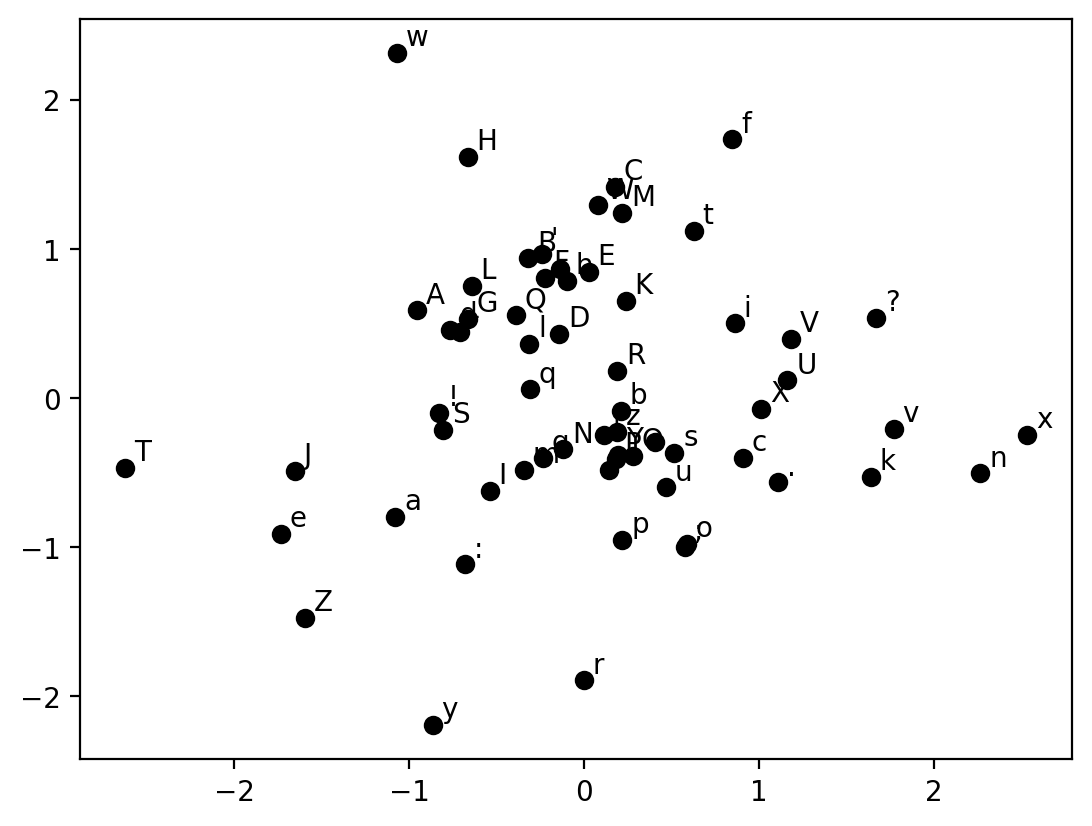

In [13]:
# Function to visualize the embedding in 2d space

def plot_emb(emb, itos, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    for i in range(len(itos)):
        x, y = emb.weight[i].detach().cpu().numpy()
        ax.scatter(x, y, color='k')
        ax.text(x + 0.05, y + 0.05, itos[i])
    return ax

plot_emb(emb, itos)

In [14]:
class NextChar(nn.Module):
  def __init__(self, block_size, vocab_size, emb_dim, hidden_size):
    super().__init__()
    self.emb = nn.Embedding(vocab_size, emb_dim)
    self.lin1 = nn.Linear(block_size * emb_dim, hidden_size)
    self.lin2 = nn.Linear(hidden_size, vocab_size)

  def forward(self, x):
    x = self.emb(x)
    x = x.view(x.shape[0], -1)
    x = torch.sin(self.lin1(x))
    x = self.lin2(x)
    return x

In [43]:
# Generate Text from untrained model


model = NextChar(block_size, len(stoi), emb_dim, 10).to(device)
# model = torch.compile(model)

g = torch.Generator()
g.manual_seed(4000002)
def generate_text(model, itos, stoi, block_size, max_len=10):
    context = [0] * block_size
    txt = ''
    for i in range(max_len):
        x = torch.tensor(context).view(1, -1).to(device)
        y_pred = model(x)
        ix = torch.distributions.categorical.Categorical(logits=y_pred).sample().item()
        ch = itos[ix]
        txt += ch
        context = context[1:] + [ix]
    return txt

print(generate_text(model, itos, stoi, block_size,30))

 uuBX:kibrcYBfh:xBeCGbZEUZqNcI


In [16]:
for param_name, param in model.named_parameters():
    print(param_name, param.shape)

emb.weight torch.Size([62, 2])
lin1.weight torch.Size([10, 8])
lin1.bias torch.Size([10])
lin2.weight torch.Size([62, 10])
lin2.bias torch.Size([62])


In [17]:
#code for training
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.01)
import time
# Mini-batch training
batch_size = 4096
print_every = 100
elapsed_time = []
for epoch in range(10000):
    start_time = time.time()
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i+batch_size]
        y = Y[i:i+batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        opt.step()
        opt.zero_grad()
    end_time = time.time()
    elapsed_time.append(end_time - start_time)
    if epoch % print_every == 0:
        print(epoch, loss.item())

0 3.2696733474731445
100 2.3324499130249023
200 2.3242011070251465
300 2.3215599060058594
400 2.317808151245117
500 2.3145201206207275
600 2.3147947788238525
700 2.310112714767456
800 2.307999849319458
900 2.305471897125244
1000 2.3036606311798096
1100 2.3020262718200684
1200 2.300664186477661
1300 2.2993040084838867
1400 2.2922840118408203
1500 2.290616512298584
1600 2.2915306091308594
1700 2.2925336360931396
1800 2.2905309200286865
1900 2.29026460647583
2000 2.2908546924591064
2100 2.2906458377838135
2200 2.29036021232605
2300 2.2901532649993896
2400 2.29002046585083
2500 2.2899367809295654
2600 2.2898812294006348
2700 2.289842367172241
2800 2.28981351852417
2900 2.2897913455963135
3000 2.28977370262146
3100 2.289759635925293
3200 2.289747953414917
3300 2.289738893508911
3400 2.289731740951538
3500 2.2897260189056396
3600 2.2897214889526367
3700 2.2897183895111084
3800 2.2897167205810547
3900 2.289715528488159
4000 2.2897157669067383
4100 2.2897160053253174
4200 2.289716958999634
430

KeyboardInterrupt: 

In [ ]:
# Visualize the embedding

# plot_emb(model.emb, itos)

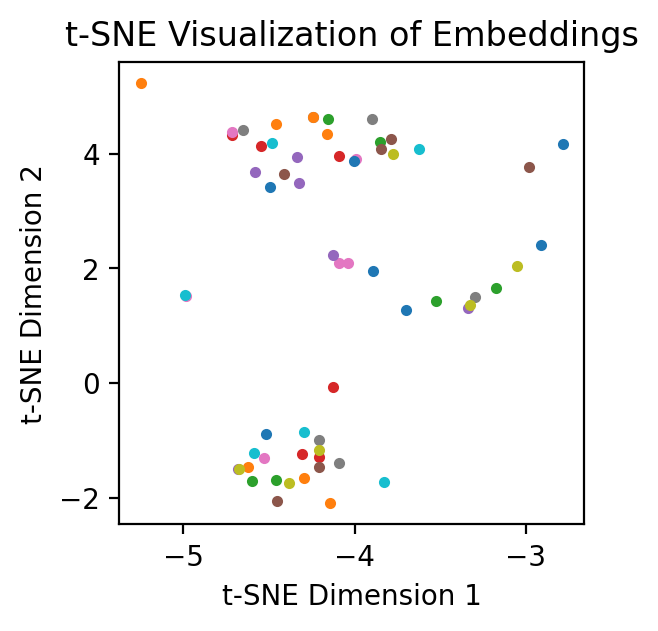

In [27]:
from sklearn.manifold import TSNE

def visualize_embeddings_with_tsne(emb, stoi, itos, title='t-SNE Visualization of Embeddings', figsize=(3, 3)):
    """
    Visualizes embeddings with t-SNE.
    
    Args:
    - emb (torch.nn.Embedding): The embedding layer.
    - stoi (dict): Dictionary mapping characters to indices.
    - itos (dict): Dictionary mapping indices to characters.
    - title (str): Title of the plot (default: 't-SNE Visualization of Embeddings').
    - figsize (tuple): Figure size (default: (10, 8)).
    
    Returns:
    - None
    """
    # Get the embeddings from the embedding layer
    embeddings = emb.weight.data.numpy()

    # Initialize t-SNE with desired parameters
    tsne = TSNE(n_components=2, random_state=42)

    # Fit t-SNE to the embeddings
    embeddings_tsne = tsne.fit_transform(embeddings)

    # Visualize the t-SNE embeddings
    plt.figure(figsize=figsize)
    for i in range(len(embeddings)):
        plt.scatter(embeddings_tsne[i, 0], embeddings_tsne[i, 1], label=itos[i], marker='.')
    plt.title(title)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    # plt.legend(title='Characters')
    plt.show()

# Example usage:
# Assuming you have already defined emb, stoi, and itos
# Replace with your actual embeddings and dictionaries
visualize_embeddings_with_tsne(model.emb, stoi, itos)

In [39]:
#generate text
print(generate_text(model, itos, stoi, block_size,100))

SIUS:
Paroed sound you srear byed wropde eni as hlild
Tit.
 GSSES:
Nir ince as yoe is uns ho'g cand 
